https://www.kaggle.com/c/titanic

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Просмотр первых строк данных
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Заполнение пропусков
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Удаление ненужных столбцов
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [ ]:
russian_names = {
    'Survived': 'Выживаемость',
    'Pclass': 'Класс_билета', 
    'Sex': 'Пол',
    'Age': 'Возраст',
    'SibSp': 'Братья_Сёстры_Супруги',
    'Parch': 'Родители_Дети',
    'Fare': 'Стоимость_билета',
    'Embarked': 'Порт_посадки'
}

# Создаем копию данных с русскими названиями
df_russian = train_data.rename(columns=russian_names)

# Настройка параметров шрифта для всех элементов
plt.rcParams.update({
    'font.size': 20,           # Базовый размер шрифта
    'axes.titlesize': 24,      # Размер заголовков осей
    'axes.labelsize': 22,      # Размер подписей осей
    'xtick.labelsize': 18,     # Размер подписей по оси X
    'ytick.labelsize': 18,     # Размер подписей по оси Y
    'legend.fontsize': 20,     # Размер шрифта легенды
    'figure.titlesize': 28     # Размер заголовка фигуры
})

# Большой график всех зависимостей от выживаемости
fig = plt.figure(figsize=(35, 25), dpi=300)

# 1. Выживаемость по классу билета
plt.subplot(3, 3, 1)
sns.countplot(data=df_russian, x='Класс_билета', hue='Выживаемость', palette=['red', 'green'])
plt.title('Выживаемость по классу билета')
plt.legend(['Не выжил', 'Выжил'])

# 2. Выживаемость по полу
plt.subplot(3, 3, 2)
sns.countplot(data=df_russian, x='Пол', hue='Выживаемость', palette=['red', 'green'])
plt.title('Выживаемость по полу')
plt.legend(['Не выжил', 'Выжил'])

# 3. Распределение возраста по выживаемости
plt.subplot(3, 3, 3)
sns.boxplot(data=df_russian, x='Выживаемость', y='Возраст', palette=['red', 'green'])
plt.title('Распределение возраста по выживаемости')
plt.xticks([0, 1], ['Не выжил', 'Выжил'])

# 4. Распределение стоимости билета по выживаемости
plt.subplot(3, 3, 4)
sns.boxplot(data=df_russian, x='Выживаемость', y='Стоимость_билета', palette=['red', 'green'])
plt.title('Стоимость билета по выживаемости')
plt.xticks([0, 1], ['Не выжил', 'Выжил'])

# 5. Выживаемость по количеству братьев/сестер/супругов
plt.subplot(3, 3, 5)
sns.countplot(data=df_russian, x='Братья_Сёстры_Супруги', hue='Выживаемость', palette=['red', 'green'])
plt.title('Выживаемость по количеству родственников')
plt.legend(['Не выжил', 'Выжил'])

# 6. Выживаемость по количеству родителей/детей
plt.subplot(3, 3, 6)
sns.countplot(data=df_russian, x='Родители_Дети', hue='Выживаемость', palette=['red', 'green'])
plt.title('Выживаемость по количеству родителей/детей')
plt.legend(['Не выжил', 'Выжил'])

# 7. Выживаемость по порту посадки
plt.subplot(3, 3, 7)
sns.countplot(data=df_russian, x='Порт_посадки', hue='Выживаемость')
plt.title('Выживаемость по порту посадки')
plt.legend(['Не выжил', 'Выжил'])

# 8. Общая статистика выживаемости
plt.subplot(3, 3, 8)
survival_counts = df_russian['Выживаемость'].value_counts()
colors = ['red', 'green']
plt.pie(survival_counts.values, labels=['Не выжил', 'Выжил'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Общая статистика выживаемости')

plt.tight_layout()
plt.show()

# Дополнительная информация
print("СЛОВАРЬ ДАННЫХ:")
print("=" * 50)
dict_info = {
    'Класс_билета': '1 = 1й класс, 2 = 2й класс, 3 = 3й класс',
    'Пол': 'Мужской/Женский',
    'Братья_Сёстры_Супруги': 'Количество братьев/сестер/супругов на борту',
    'Родители_Дети': 'Количество родителей/детей на борту', 
    'Стоимость_билета': 'Стоимость билета',
    'Порт_посадки': 'Порт посадки (C = Шербур, Q = Квинстаун, S = Саутгемптон)'
}

for col, desc in dict_info.items():
    print(f"{col}: {desc}")

In [9]:
# Преобразование категориальных переменных
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

In [11]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [13]:
# Разделение на признаки и целевую переменную
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [15]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размеры данных: X_train {X_train.shape}, X_test {X_test.shape}")

Размеры данных: X_train (712, 8), X_test (179, 8)


In [17]:
# Модели с Pipeline и GridSearch
models = {
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100], 'max_depth': [5, 10]}
    ),
    'Gradient Boosting': (
        GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]}
    ),
    'Logistic Regression': (
        Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression(random_state=42))]),
        {'model__C': [0.1, 1, 10]}
    ),
    'SVM': (
        Pipeline([('scaler', StandardScaler()), 
                 ('model', SVC(random_state=42))]),
        {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
    )
}

In [19]:
# Обучение с GridSearch
results = {}

for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    predictions = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    
    print(f"{name}: {accuracy:.3f} (лучшие параметры: {grid_search.best_params_})")

Random Forest: 0.816 (лучшие параметры: {'max_depth': 5, 'n_estimators': 100})
Gradient Boosting: 0.799 (лучшие параметры: {'learning_rate': 0.05, 'n_estimators': 100})
Logistic Regression: 0.793 (лучшие параметры: {'model__C': 0.1})
SVM: 0.821 (лучшие параметры: {'model__C': 1, 'model__kernel': 'rbf'})


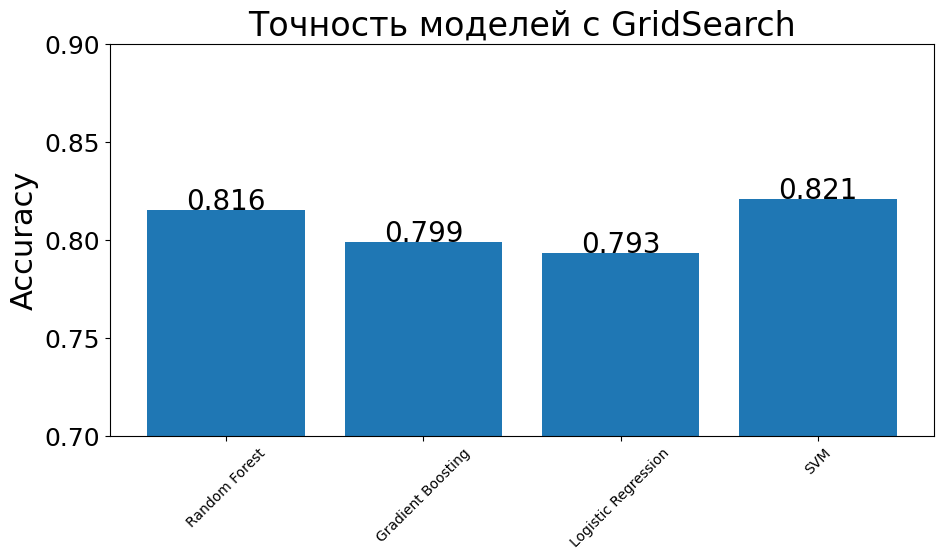

In [31]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Точность моделей с GridSearch')
plt.xticks(rotation=45, fontsize=10) 
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
# Добавляем значения на столбцы
for i, (model, acc) in enumerate(results.items()):
    plt.text(i, acc, f'{acc:.3f}', ha='center')

plt.tight_layout()
plt.show()

In [33]:
# Лучшая модель
best_model = max(results, key=results.get)
print(f"Лучшая модель: {best_model} ({results[best_model]:.3f})")

Лучшая модель: SVM (0.821)
